In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [14]:
df = pd.read_csv("/nfs_home/users/osvk/projects/tskit-ld/logs/compute_times/r2_array_method/compute_times.txt", sep="\t")
#df = df.loc[df['num_samples'] != 250000] #data not ready yet, so wrong time recorded
df = df.loc[df.groupby(['num_samples','method','max_sites','max_kb'])['time_taken_sec'].transform('max').eq(df['time_taken_sec'])].reset_index(drop=True)
df['params'] = df['method'] + '_' + df['max_sites'].astype(str) + 'sites_' + df['max_kb'].astype(str) + 'kb'
df = df.drop(columns=['method', 'max_sites', 'max_kb'])
df = df.pivot(index='num_samples', columns='params', values='time_taken_sec').reset_index()
df

params,num_samples,plink_100sites_200kb,plink_100sites_500kb,plink_10sites_200kb,plink_10sites_500kb,plink_50sites_200kb,plink_50sites_500kb,plink_75sites_200kb,plink_75sites_500kb,tskit_100sites_200kb,tskit_100sites_500kb,tskit_10sites_200kb,tskit_10sites_500kb,tskit_50sites_200kb,tskit_50sites_500kb,tskit_75sites_200kb,tskit_75sites_500kb
0,10,0.216961,0.304110,0.131489,0.104767,0.248871,0.194413,0.240433,0.258620,0.803161,1.198331,0.188386,0.173855,0.547892,0.448495,0.628262,0.619336
1,100,0.279686,0.285988,0.139498,0.137917,0.222421,0.231949,0.272294,0.289230,3.078660,2.050473,0.387777,0.635237,1.042983,1.076281,2.592080,1.512365
2,1000,1.179888,1.220478,0.353648,0.256952,0.431803,0.541586,0.993871,0.982674,14.048439,15.113018,2.524362,1.387407,5.608133,8.701691,6.703329,6.755674
3,10000,7.749621,5.582280,2.169916,0.803033,3.725447,3.346622,4.705147,4.328471,59.435494,34.773855,7.436457,10.496796,32.353249,19.160202,31.484695,32.523500
4,25000,16.061936,18.918803,7.642232,6.710845,10.624698,6.428034,12.995045,13.553100,64.730919,83.921659,25.978247,14.987034,35.835490,35.527656,72.247083,50.929785
5,50000,39.204216,46.043547,15.843241,16.036141,28.139788,35.582976,22.460649,44.812739,105.512381,131.359061,30.867125,30.400198,63.544751,79.650526,83.257048,106.059774
6,75000,68.360053,169.194285,28.926759,25.390301,46.991122,46.123720,38.608223,79.072357,140.669649,189.771329,47.526882,41.883022,88.834672,86.868103,114.237204,141.869187
7,100000,116.367386,114.947034,41.432833,39.617662,75.412046,63.171207,56.216899,115.978195,191.671948,236.323059,62.708120,56.969244,112.826152,103.825844,143.684265,192.552295
8,250000,259.750243,327.250232,171.716888,80.135426,187.399443,327.211878,283.532550,293.776805,693.059288,415.373279,310.925244,307.734592,490.533058,529.423353,410.740492,631.855189


In [15]:
df200 = df.filter(regex='(num_samples|200kb)')
df500 = df.filter(regex='(num_samples|500kb)')

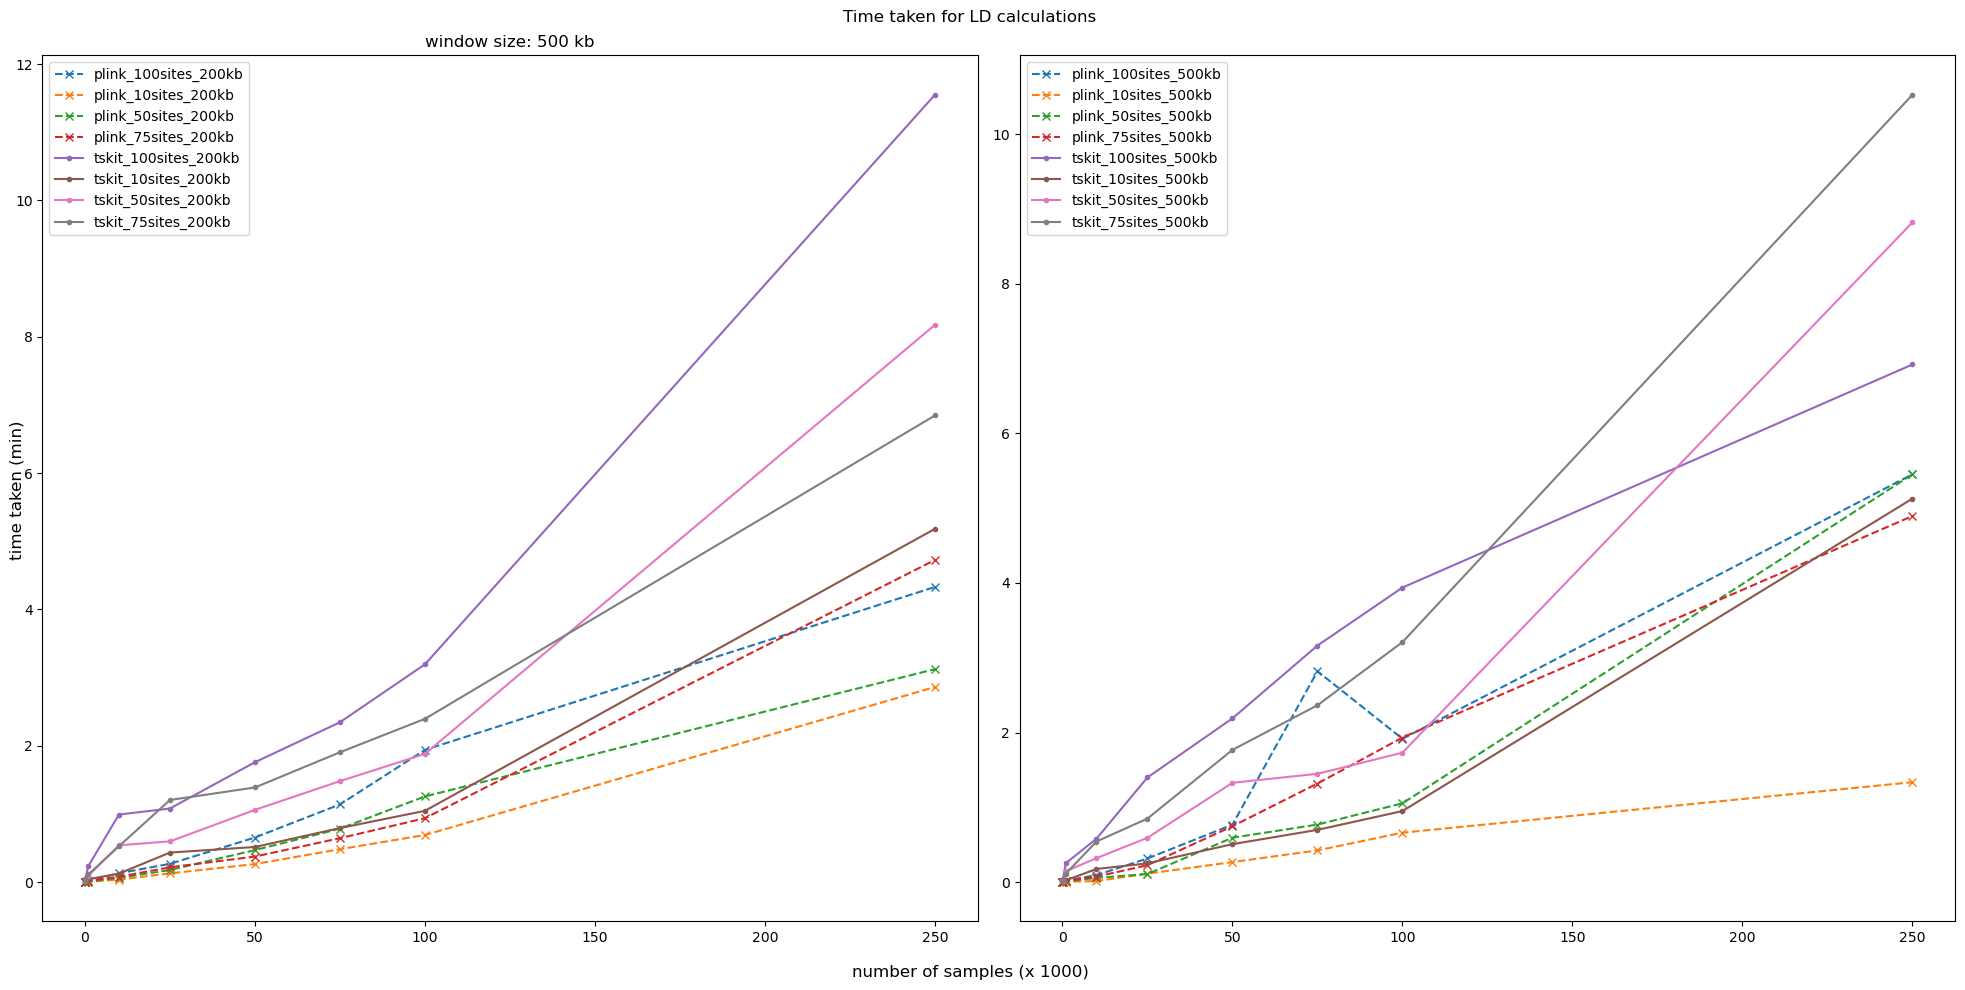

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
for col in df200:
    if col != "num_samples":
        if 'plink' in col:
            linestyle='dashed'
            marker='x'
        if 'tskit' in col:
            linestyle='solid'
            marker='.'
        axes[0].plot(df200['num_samples']/1_000,df200[col]/60,label=col, marker=marker,linestyle=linestyle)
for col in df500:
    if col != "num_samples":
        if 'plink' in col:
            linestyle='dashed'
            marker='x'
        if 'tskit' in col:
            linestyle='solid'
            marker='.'
        axes[1].plot(df500['num_samples']/1_000,df500[col]/60,label=col, marker=marker,linestyle=linestyle)
axes[0].legend()
axes[1].legend()
fig.suptitle("Time taken for LD calculations")
axes[0].set_title("window size: 200 kb")
axes[0].set_title("window size: 500 kb")
fig.supxlabel('number of samples (x 1000)')
fig.supylabel('time taken (min)')
fig.tight_layout()
plt.show()